BRIEF:

Churn rate is a measure of the number of customers or employees who leave a company during a given period. It can also refer to the amount of revenue lost as a result of the departures. Changes in a business's churn rate can provide valuable insight into an organization.

The below are columns in our dataset
RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Churn

In [16]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading our dataset
Churn_rate = pd.read_csv('/content/Churn_Modelling.csv')
Churn_rate

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
Churn_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
Churn_rate.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn'],
      dtype='object')

In [5]:
Churn_rate.shape

(10000, 14)

There are 10000 rows and 14 columns in this dataset

In [6]:
# Checking for missing data in our dataset and from the below output we can see that there is none
Churn_rate.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

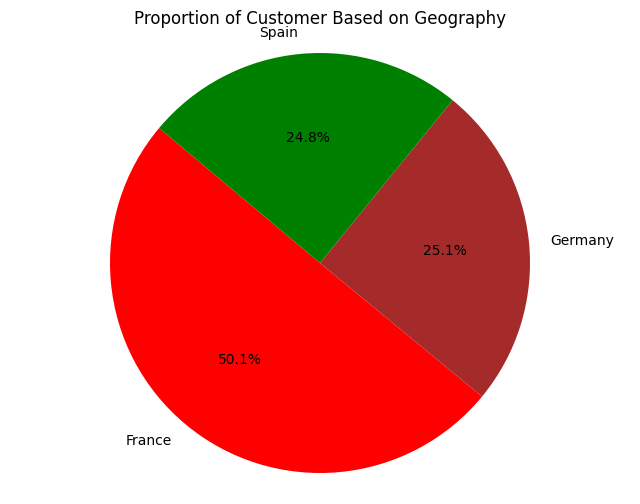

In [11]:
# Finding percetange ratio Geographcally
Geographcally_count = Churn_rate['Geography'].value_counts()
colors = ['red', 'brown', 'green']
plt.figure(figsize=(8, 6))
plt.pie(Geographcally_count, labels=Geographcally_count.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Proportion of Customer Based on Geography')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

 50.1% of the customers hail from the France region, followed by Germany, with Spain having the fewest customers.

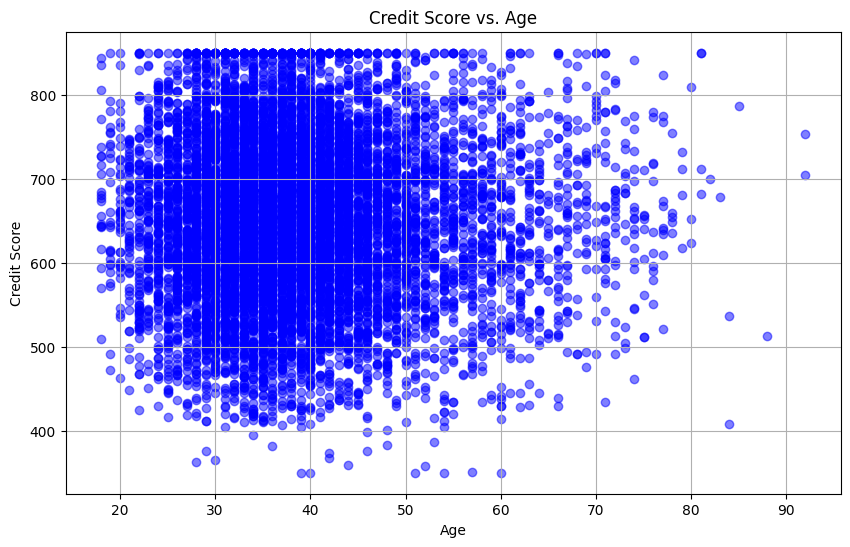

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter('Age','CreditScore', color='blue', alpha=0.5,data =Churn_rate)
plt.title('Credit Score vs. Age')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

 Customers aged between 25 and 50 years old typically exhibit strong credit scores. Among this age group, a majority of customers have credit scores of 500 or higher.

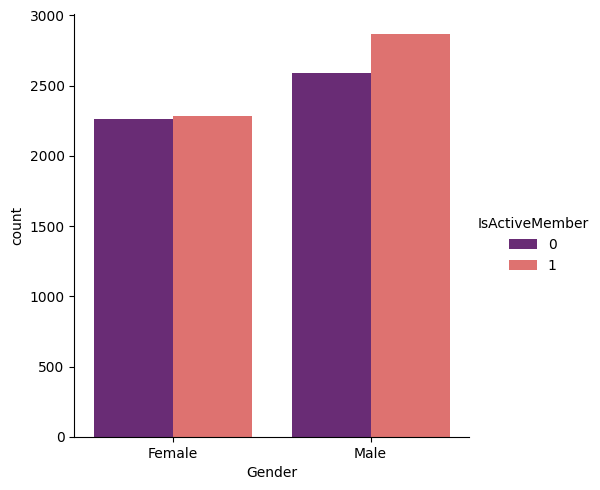

In [21]:
sns.catplot(x="Gender", kind="count", palette="magma", hue='IsActiveMember', data=Churn_rate)

 The gender distribution depicted above reveals that we have a larger number of male customers, and they also more active compared to females.

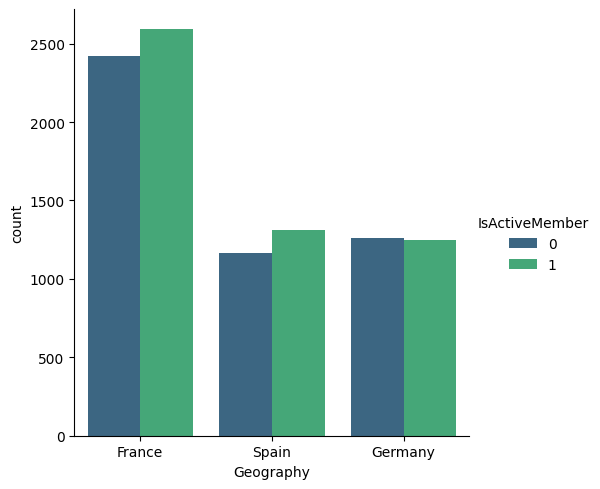

In [23]:
sns.catplot(x="Geography", kind="count", palette="viridis", hue='IsActiveMember', data=Churn_rate)

The catplot above illustrates the distribution of active and inactive customers across different geographical regions. Dark green represents inactive customers, while lighter shades of green denote active ones. Interestingly, France stands out with the highest number of customers, both active and inactive. However, it's notable that Germany has a higher proportion of inactive customers compared to the other regions.

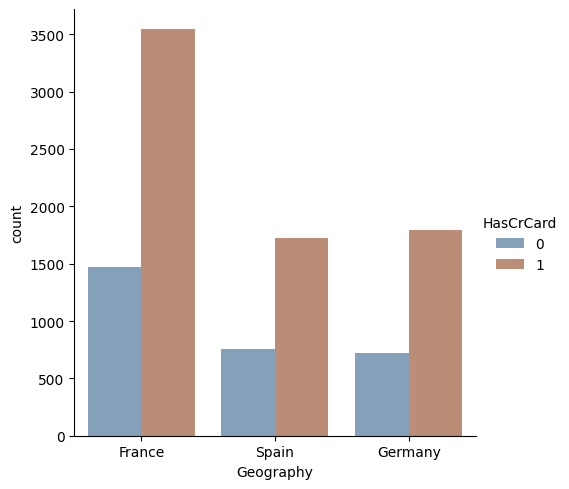

In [13]:

sns.catplot(x="Geography", kind="count", palette="twilight_shifted", hue='HasCrCard', data=Churn_rate)


In France, 3500 users have a credit card, while 1500 do not. In Germany, 1750 customers have a credit card, and in Spain, 1700 customers use a credit card. Interestingly, both Germany and Spain have an equal number of customers who do not have a credit card.

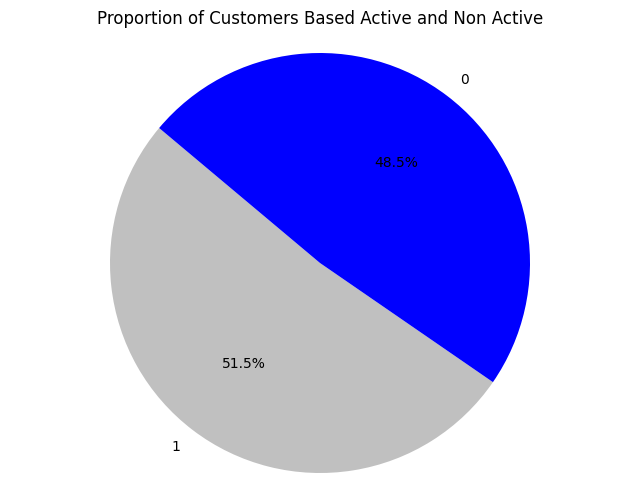

In [7]:
# Finding percetange ratio of active and non active customers
IsActiveMember_count = Churn_rate['IsActiveMember'].value_counts()
colors = ['silver', 'blue']
plt.figure(figsize=(8, 6))
plt.pie(IsActiveMember_count, labels=IsActiveMember_count.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Proportion of Customers Based Active and Non Active')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In our dataset, we've demonstrated that the number of active customers exceeds that of non-active ones, with a ratio of 51.5% to 48.5%.








In [15]:
Churn_rate.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
Churn_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Churn_rate['Surname'] = label_encoder.fit_transform(Churn_rate['Surname'])
Churn_rate['Geography'] = label_encoder.fit_transform(Churn_rate['Geography'])
Churn_rate['Gender'] = label_encoder.fit_transform(Churn_rate['Gender'])


In [8]:
Churn_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [9]:
Churn_rate.corr()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
RowNumber,1.000000,0.004202,0.001682,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005689,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Surname,0.001682,0.005689,1.000000,0.007489,-0.022878,-0.002049,0.005550,-0.017412,0.002657,-0.016460,-0.008993,0.001483,0.011850,-0.010822
CreditScore,0.005840,0.005308,0.007489,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,-0.022878,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002049,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,0.005550,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,-0.017412,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.002657,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,-0.016460,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


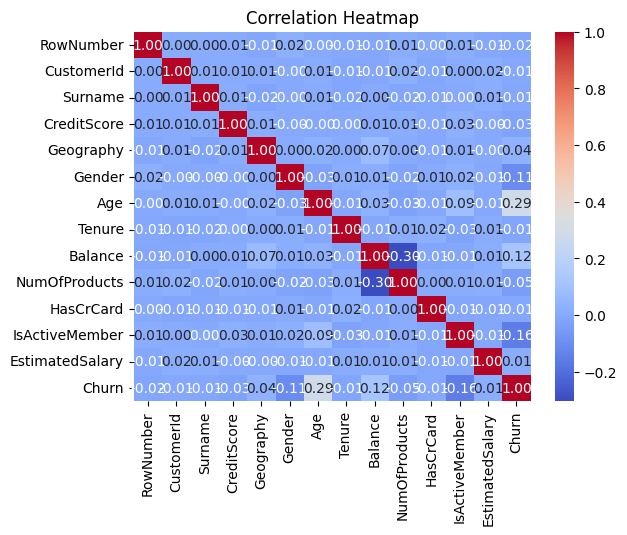

In [14]:
sns.heatmap(Churn_rate.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation coefficient between IsActiveMember and Age is 0.085472, indicating a very weak positive correlation between these two variables. This suggests a slight tendency for the IsActiveMember variable to increase as Age increases, but the correlation is not strong.

CreditScore & Geography: The correlation between CreditScore and Geography is very weak (0.007888), indicating almost no linear relationship between them.

Observations :

1. France has the highest representation among customers in our dataset, accounting for 50.1%, followed by Germany, with Spain having the fewest customers.

2. Customers aged between 25 and 50 years old tend to have robust credit scores, with a significant number scoring 500 or above.

3. There's a gender disparity in our customer base, with a larger proportion being male. Additionally, male customers appear to be more active compared to females.

4. Geographically, France dominates our dataset, with the highest number of customers, both active and inactive. However, Germany shows a higher proportion of inactive customers compared to other regions.

5. The distribution of credit card usage varies across countries, with France having the highest number of users, followed by Germany and then Spain. Interestingly, Germany and Spain have an equal number of customers without credit cards.

6. We've observed that active customers outnumber non-active ones, with a ratio of 51.5% to 48.5%.

7. There is a very weak positive correlation (0.085472) between the variables IsActiveMember and Age, suggesting a slight tendency for the active member status to increase with age.

Recommendations:

1. Consider strategies to attract more customers from regions with lower representation, such as Spain, to balance the geographical distribution of customers.

2. Develop targeted marketing campaigns or financial products tailored to the credit needs and preferences of customers within the 25 to 50 age range.

3. Implement initiatives to address the gender gap and encourage more female participation or engagement with the services offered.

4. Analyze the factors contributing to the higher proportion of inactive customers in Germany and devise retention strategies to increase their engagement.

5. Explore reasons behind the variation in credit card usage across countries and tailor offerings or incentives to encourage more customers to adopt credit card services.

6. Continue efforts to maintain or increase the ratio of active customers, potentially through personalized services or loyalty programs.

7. While the correlation between IsActiveMember and Age is weak, further investigation into age-related factors influencing customer activity levels may provide insights for targeted interventions.





